<a href="https://colab.research.google.com/github/kulasekhaRR/LGM/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Next Word Prediction:

Important Libraries for the Predictions:

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
import numpy as np

import heapq

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

from keras.models import Sequential, load_model

from keras.layers.core import Dense, Activation

from keras.layers import LSTM

import pickle

from keras.optimizers import RMSprop

Storing the data from text mode in a datatype:

In [7]:
file = open("1661-0.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿

The Last Line:  



In [8]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]


" Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net   Title: The Adventures of Sherl"

In [9]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

' Project Gutenberg s The Adventures of Sherlock Holmes  by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever   You may copy it  give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg net   Title  The Adventures of Sherlock Holmes  Author  Arthur Conan Doyle  Release Date  November 29  2002  EBook  1661  Last Updated  May 20  2019  Language  English  Charact'

In [10]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use anyone anywhere at no cost and with almost restrictions whatsoever. You may copy it, give it away or re-use under terms Gutenberg License included this online www.gutenberg.net Title: Holmes Author: Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES SHERLOCK HOLMES Prod"

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[838, 3083, 56, 322, 57, 1523, 15, 95, 839, 3084]

In [12]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8931


In [13]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  17678


array([[ 838, 3083],
       [3083,   56],
       [  56,  322],
       [ 322,   57],
       [  57, 1523],
       [1523,   15],
       [  15,   95],
       [  95,  839],
       [ 839, 3084],
       [3084, 3085]])

In [14]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [15]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 838 3083   56  322   57]
The responses are:  [3083   56  322   57 1523]


In [16]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             89310     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8931)              8939931   
                                                                 
Total params: 22,078,241
Trainable params: 22,078,241
Non-trainable params: 0
_________________________________________________________________


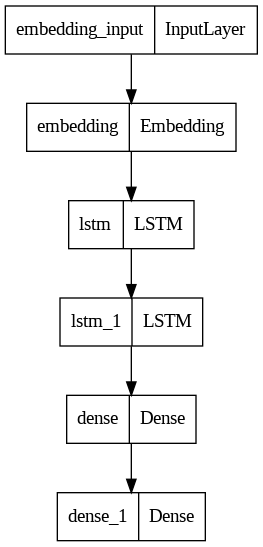

In [19]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [21]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
277/277 [==============================] - ETA: 0s - loss: 8.8753
Epoch 1: loss improved from inf to 8.87532, saving model to nextword1.h5
277/277 [==============================] - 124s 429ms/step - loss: 8.8753 - lr: 0.0010
Epoch 2/150
277/277 [==============================] - ETA: 0s - loss: 8.3548
Epoch 2: loss improved from 8.87532 to 8.35480, saving model to nextword1.h5
277/277 [==============================] - 122s 439ms/step - loss: 8.3548 - lr: 0.0010
Epoch 3/150
277/277 [==============================] - ETA: 0s - loss: 8.0908
Epoch 3: loss improved from 8.35480 to 8.09079, saving model to nextword1.h5
277/277 [==============================] - 117s 423ms/step - loss: 8.0908 - lr: 0.0010
Epoch 4/150
277/277 [==============================] - ETA: 0s - loss: 7.8529
Epoch 4: loss improved from 8.09079 to 7.85288, saving model to nextword1.h5
277/277 [==============================] - 117s 424ms/step - loss: 7.8529 - lr: 0.0010
Epoch 5/150
277/277 [===============

In [12]:
path = '1661-0.txt'
text = open(path).read().lower()
print('length of the corpus is: :', len(text))

length of the corpus is: : 581888


In [13]:
tokenizer = RegexpTokenizer(r'w+')
words = tokenizer.tokenize(text)

Getting unique words: We get all the unique words and we require a dictionary with each word in the data within the list of unique words as the key and its significant portions as value.

In [14]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

Feature Engineering: Feature engineering will make the words into numerical representation so that it is easy to process them.

In [15]:
LENGTH_WORD = 5
next_words = []
prev_words = []
for j in range(len(words) - LENGTH_WORD):
     prev_words.append(words[j:j + LENGTH_WORD])
     next_words.append(words[j + LENGTH_WORD])
print(prev_words[0])
print(next_words[0])

['w', 'w', 'w', 'w', 'w']
www


Storing features and labels: X will be used to get the features and Y to get the labels associated with them.

In [16]:
X = np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
   for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
   Y[i, unique_word_index[next_words[i]]] = 1

Building our model: We can see that we have built an LSTM model and used a softmax activation at the end to get few specific words predicted by the model.

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(LENGTH_WORD, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

Epoch 1/2
86/86 [==============================] - 6s 30ms/step - loss: 0.0134 - accuracy: 0.9999 - val_loss: 0.1436 - val_accuracy: 0.9844
Epoch 2/2
86/86 [==============================] - 2s 19ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.2024 - val_accuracy: 0.9844


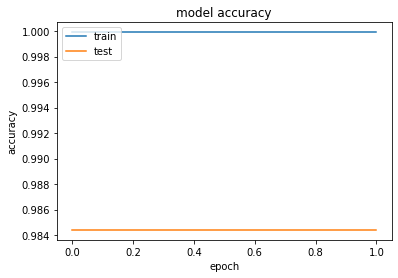

In [18]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

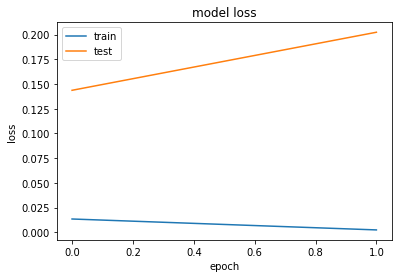

In [19]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [20]:
def prepare_input(text):
    x = np.zeros((1, LENGTH_WORD, len(words)))
    for t, char in enumerate(text):
       x[0, t, unique_word_index[char]] = 1.
    return x
def sample(preds, top_n=3):
   preds = np.asarray(preds).astype('float64')
   preds = np.log(preds)
   exp_preds = np.exp(preds)
   preds = exp_preds / np.sum(exp_preds)
   return heapq.nlargest(top_n, range(len(preds)), preds.take)
def predict_completions(text, n=3):

    x = prepare_input(text)

    preds = model.predict(x, verbose=0)[0]

    next_indices = sample(preds, n)

    return [unique_word_index[idx] + predict_completions(text[1:] + unique_word_index[idx]) for idx in next_indices]